# Assignment 06 - Data Visualization III


PROBLEM STATEMENT/ DEFINITION	

Download the Iris flower dataset (`iris.csv`) or any other dataset into a DataFrame. (e.g., https://archive.ics.uci.edu/ml/datasets/Iris). 
Scan the dataset and give the inference as:
1.	 List down the features and their types (e.g., numeric, nominal) available in the dataset.
2.	 Create a histogram for each feature in the dataset to illustrate the feature distributions.
3.	 Create a box plot for each feature in the dataset.
4.	 Compare distributions and identify outliers.


> Note: since they want to identify outlier, in preprocessing step, we shouldn't remove them

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Preprocessing

In [3]:
rename_map = {}
for col in df.columns:
    rename_map[col] = col.lower()

df = df.rename(columns=rename_map)
df.columns

Index(['id', 'sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')

In [4]:
df = df.drop(columns=['id'])
df.columns

Index(['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')

In [5]:
df.dtypes

sepallengthcm    float64
sepalwidthcm     float64
petallengthcm    float64
petalwidthcm     float64
species           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepallengthcm  150 non-null    float64
 1   sepalwidthcm   150 non-null    float64
 2   petallengthcm  150 non-null    float64
 3   petalwidthcm   150 non-null    float64
 4   species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isna().sum()

sepallengthcm    0
sepalwidthcm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64

In [9]:
species_group = df.groupby(by="species")
for col in df.select_dtypes(include=["number"]):
    print(f"\t\t=={col}==")
    print(species_group[col].agg(['mean','median']))
    print(species_group[col].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).rename('mode'))
    print(species_group[col].agg(['std','min','max']))

		==sepallengthcm==
                  mean  median
species                       
Iris-setosa      5.006     5.0
Iris-versicolor  5.936     5.9
Iris-virginica   6.588     6.5
species
Iris-setosa        5.0
Iris-versicolor    5.5
Iris-virginica     6.3
Name: mode, dtype: float64
                      std  min  max
species                            
Iris-setosa      0.352490  4.3  5.8
Iris-versicolor  0.516171  4.9  7.0
Iris-virginica   0.635880  4.9  7.9
		==sepalwidthcm==
                  mean  median
species                       
Iris-setosa      3.418     3.4
Iris-versicolor  2.770     2.8
Iris-virginica   2.974     3.0
species
Iris-setosa        3.4
Iris-versicolor    3.0
Iris-virginica     3.0
Name: mode, dtype: float64
                      std  min  max
species                            
Iris-setosa      0.381024  2.3  4.4
Iris-versicolor  0.313798  2.0  3.4
Iris-virginica   0.322497  2.2  3.8
		==petallengthcm==
                  mean  median
species                       
I

# Data Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distributions

Text(0.5, 1.0, 'Distribution of Flowers according to their species')

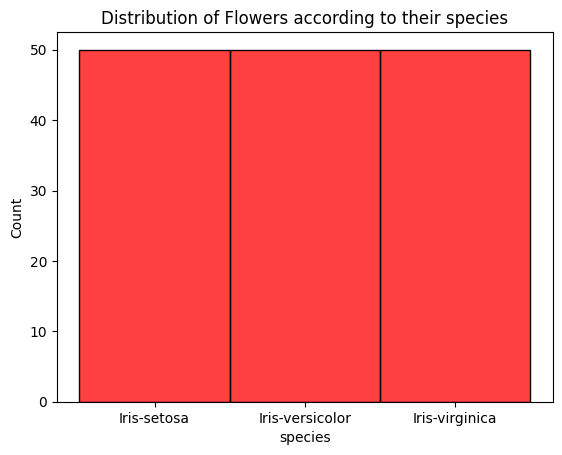

In [11]:
sns.histplot(df, x="species", color="red")
plt.title("Distribution of Flowers according to their species")

Text(0.5, 1.0, 'Distrubution of sepallengthcm in dataset')

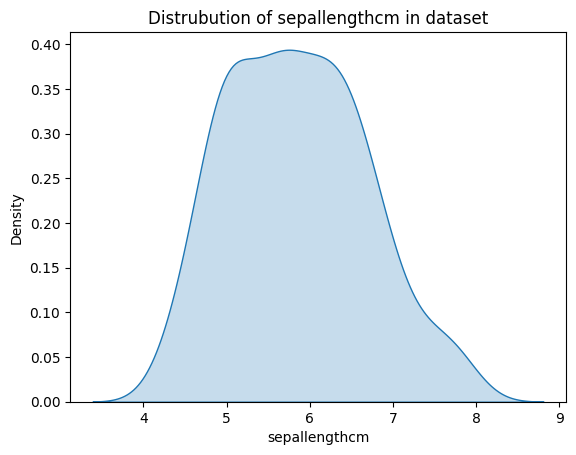

In [12]:
sns.kdeplot(df, x="sepallengthcm", fill="True")
plt.title("Distrubution of sepallengthcm in dataset")

Text(0.5, 1.0, 'Distrubution of sepalwidthcm in dataset')

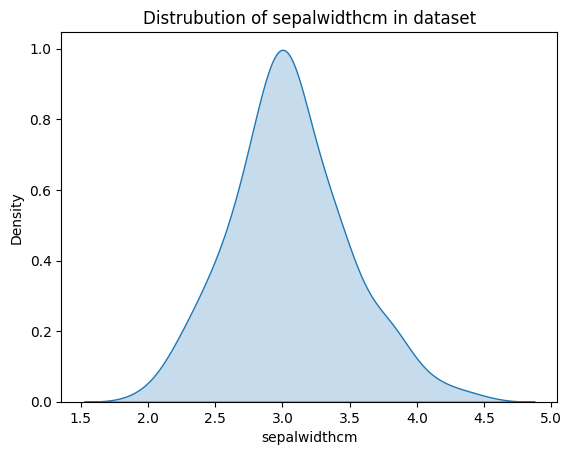

In [13]:
sns.kdeplot(df, x="sepalwidthcm", fill="True")
plt.title("Distrubution of sepalwidthcm in dataset")

Text(0.5, 1.0, 'Distribution of petallengthcm in dataset')

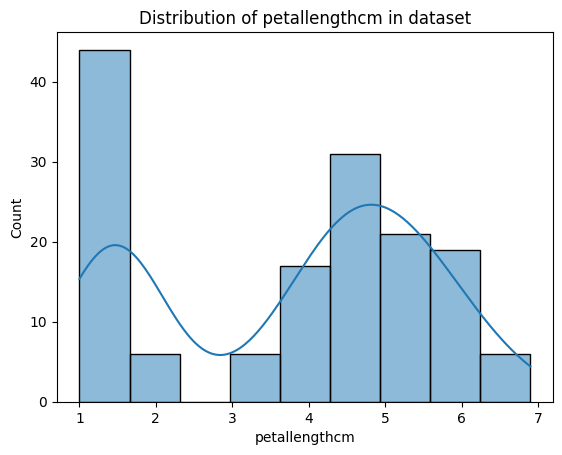

In [14]:
sns.histplot(df, x="petallengthcm", fill=True, kde=True)
plt.title("Distribution of petallengthcm in dataset")

Text(0.5, 1.0, 'Distribution of petalwidthcm in dataset')

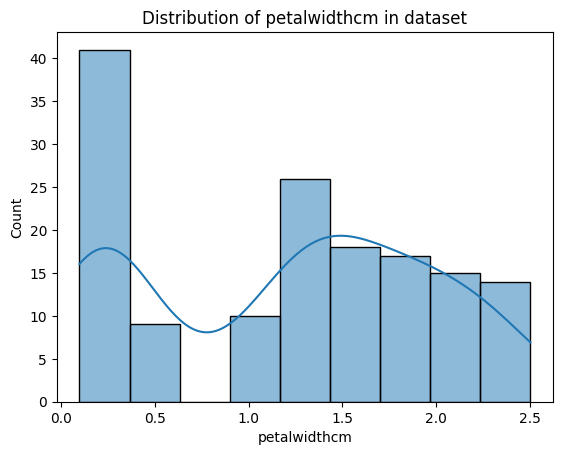

In [15]:
sns.histplot(df,x="petalwidthcm", fill=True, kde=True)
plt.title("Distribution of petalwidthcm in dataset")

# Categorical Distribution

<Axes: xlabel='species', ylabel='sepallengthcm'>

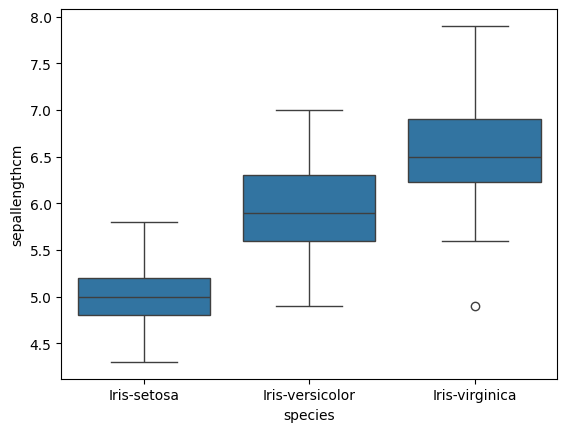

In [16]:
sns.boxplot(df, x="species", y="sepallengthcm")

<Axes: xlabel='species', ylabel='sepalwidthcm'>

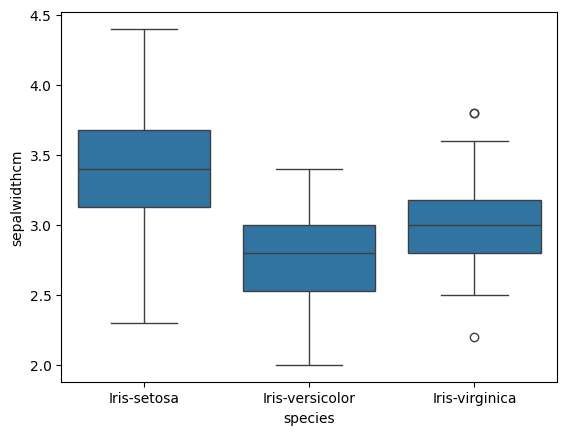

In [17]:
sns.boxplot(df, x="species", y="sepalwidthcm")

<Axes: xlabel='species', ylabel='petallengthcm'>

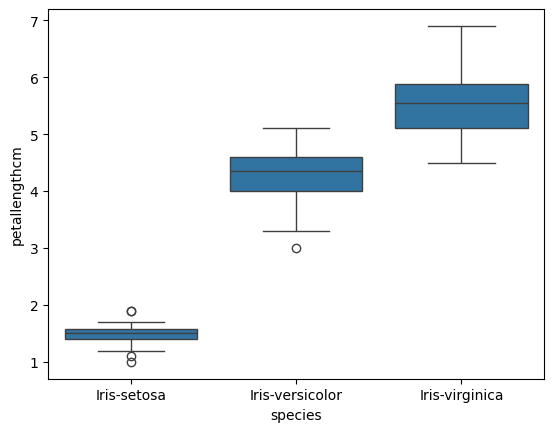

In [18]:
sns.boxplot(df, x="species", y="petallengthcm")

<Axes: xlabel='species', ylabel='petalwidthcm'>

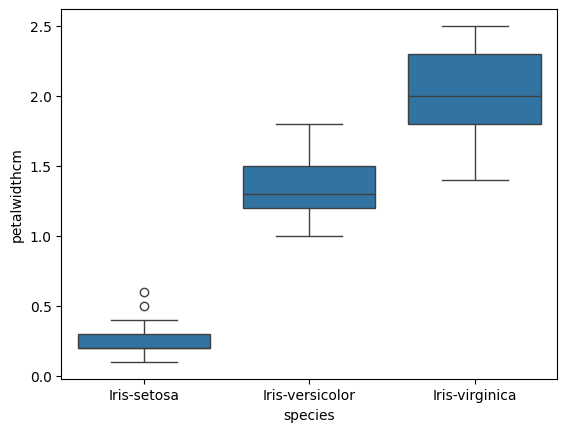

In [19]:
sns.boxplot(df, x="species", y="petalwidthcm")

In [20]:
corr = df.select_dtypes(include=['number']).corr()
corr

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
sepallengthcm,1.000000,-0.109369,0.871754,0.817954
sepalwidthcm,-0.109369,1.000000,-0.420516,-0.356544
petallengthcm,0.871754,-0.420516,1.000000,0.962757
petalwidthcm,0.817954,-0.356544,0.962757,1.000000


We can see a high correlation between `sepallengthcm` vs {`petallengthcm` and `petalwidthcm`}   
Also we see a high correlation between `petallengthcm` and `petalwidthcm`

<Axes: >

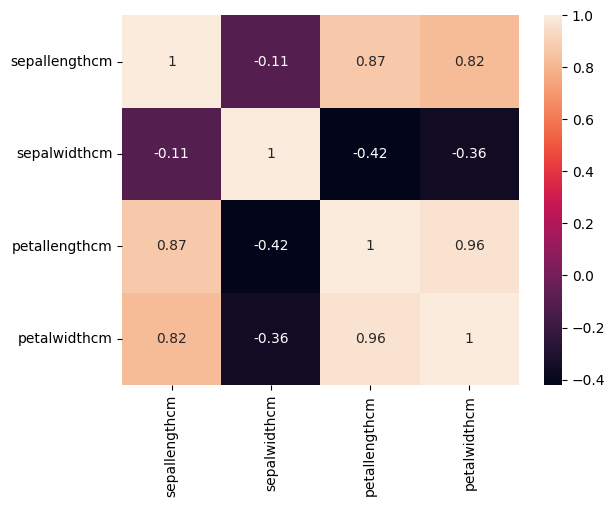

In [21]:
sns.heatmap(corr, annot=True)

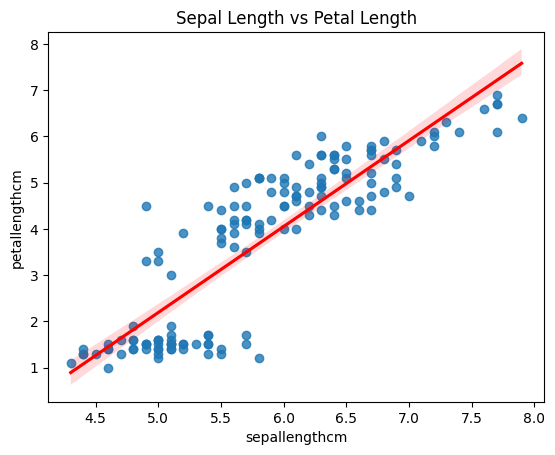

In [22]:
# Sepal Length vs Petal Length
sns.regplot(data=df, x="sepallengthcm", y="petallengthcm",line_kws={"color":"red"})
plt.title("Sepal Length vs Petal Length")
plt.show()

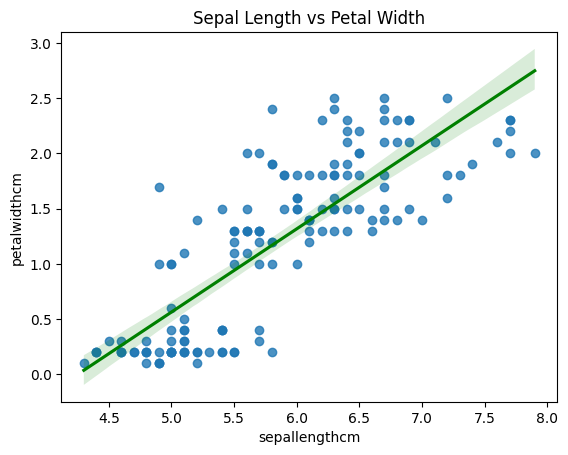

In [23]:
sns.regplot(data=df, x="sepallengthcm", y="petalwidthcm",line_kws={"color":"green"})
plt.title("Sepal Length vs Petal Width")
plt.show()

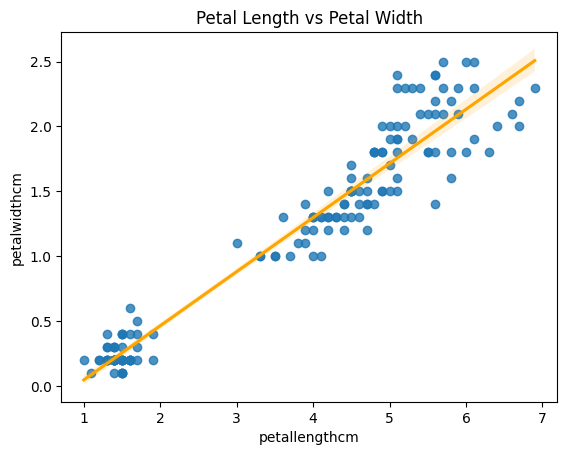

In [24]:
sns.regplot(data=df, x="petallengthcm", y="petalwidthcm",line_kws={"color":"orange"})
plt.title("Petal Length vs Petal Width")
plt.show()

## Comparing Distributions

<Axes: xlabel='sepallengthcm', ylabel='Count'>

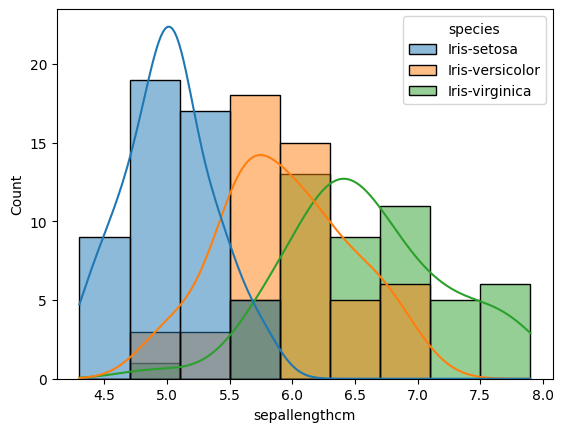

In [25]:
sns.histplot(df, x="sepallengthcm", hue="species", kde=True, fill=True)

<Axes: xlabel='sepalwidthcm', ylabel='Count'>

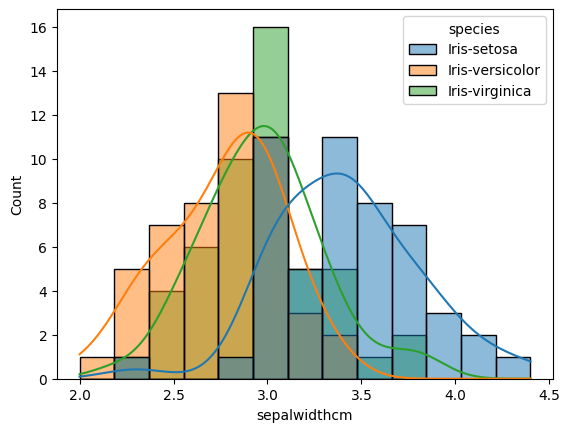

In [26]:
sns.histplot(df, x="sepalwidthcm", hue="species", kde=True, fill=True)

<Axes: xlabel='petallengthcm', ylabel='Count'>

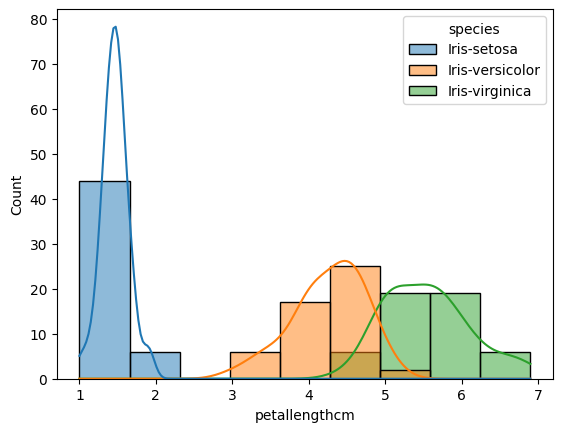

In [27]:
sns.histplot(df, x="petallengthcm", hue="species", kde=True, fill=True)

<Axes: xlabel='petalwidthcm', ylabel='Count'>

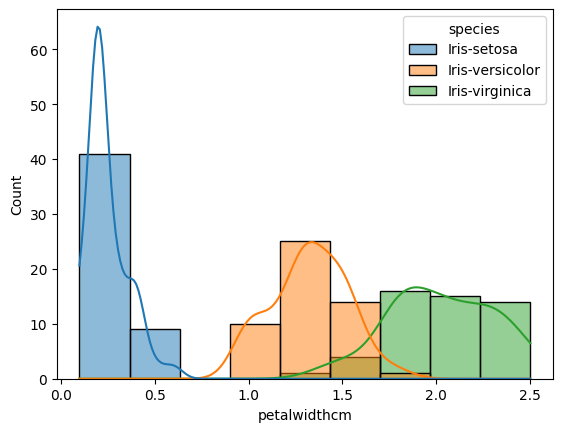

In [28]:
sns.histplot(df, x="petalwidthcm", hue="species", kde=True, fill=True)